In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [4]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df[['v1', 'v2']]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.columns = ['label', 'message']

In [7]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


<Axes: xlabel='label', ylabel='count'>

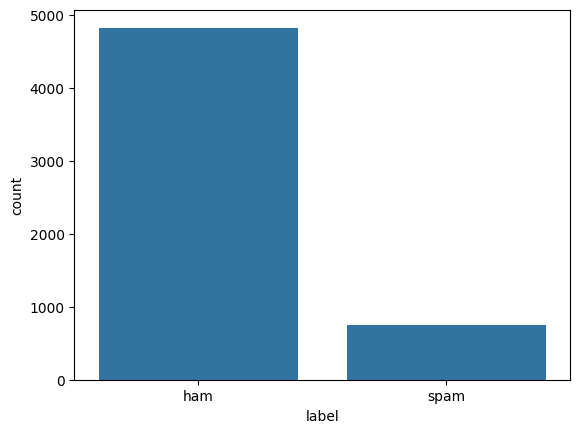

In [8]:
sns.countplot(x='label', data=df)

In [9]:
cv = CountVectorizer()
X = cv.fit_transform(df['message'])  # Features (text vectorized)
y = df['label']                      # Labels (ham or spam)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [11]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [12]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.97847533632287

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
 [[952  13]
 [ 11 139]]


In [13]:
sample = ["Win $1000 now!", "Hi mom, I’ll call you later"]
sample_vec = cv.transform(sample)
print(model.predict(sample_vec))  # ['spam', 'ham']


['spam' 'ham']
